In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')


In [2]:

(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()



11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)


X_train shape:  (60000, 28, 28)
X_test shape:  (10000, 28, 28)


In [4]:
# Reshaping
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)

X_train shape:  (60000, 28, 28, 1)
X_test shape:  (10000, 28, 28, 1)


In [5]:
# Label Encoding (be careful! run just once!)
from keras.utils.np_utils import to_categorical 

# convert to one-hot-encoding(one hot vectors)
Y_train = to_categorical(Y_train, num_classes = 10)
# convert to one-hot-encoding(one hot vectors)
Y_test = to_categorical(Y_test, num_classes = 10)

print(Y_train.shape)
print(Y_test.shape)

(60000, 10)
(10000, 10)


In [6]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state = 2)
print("x_train shape: ",x_train.shape)
print("x_val shape: ",x_val.shape)
print("y_train shape: ",y_train.shape)
print("y_val shape :",y_val.shape)

x_train shape:  (54000, 28, 28, 1)
x_val shape:  (6000, 28, 28, 1)
y_train shape:  (54000, 10)
y_val shape : (6000, 10)


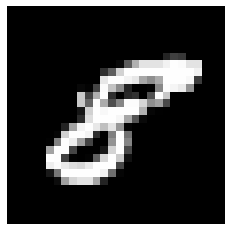

In [7]:
# Some examples
plt.imshow(x_train[4].reshape(28,28),cmap="gray")
plt.axis("off")
plt.show()

In [54]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix

from keras.models import Sequential, model_from_json
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

model = Sequential()

#1. LAYER
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Activation("relu"))

#2. LAYER
model.add(Conv2D(filters = 32, kernel_size = (3,3),strides=(1,1), padding = 'Same'))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPool2D(pool_size=(2, 2)))

#3. LAYER
model.add(Conv2D(filters = 64, kernel_size = (3,3),strides=(1,1), padding = 'Same'))
model.add(BatchNormalization())
model.add(Activation("relu"))

#4. LAYER
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

#FULLY CONNECTED LAYER
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.25))

#OUTPUT LAYER
model.add(Dense(10, activation='softmax'))

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 1)         10        
                                                                 
 batch_normalization_5 (Batc  (None, 28, 28, 1)        4         
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 28, 28, 1)         0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 batch_normalization_6 (Batc  (None, 256)              1024      
 hNormalization)                                      

In [56]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [57]:
# Compile the model
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

<a id="8"></a>
### Epochs and Batch Size

In [58]:
epochs = 10 
batch_size = 100

In [59]:
# Data Augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=0.1,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

In [60]:
# # save the best weights
# checkpointer = ModelCheckpoint(filepath="../yourPath/fashion_mnist_model.h5", verbose=1, save_best_only=True)

In [61]:

history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                              shuffle=True, #veriler random gelip eğitilir
                              epochs=epochs, 
                              validation_data = (x_val, y_val), 
                              steps_per_epoch=x_train.shape[0] // batch_size)
#                               callbacks=[checkpointer]) #we save the best weights with checkpointer

Epoch 1/10
540/540 [==============================] - 33s 60ms/step - loss: 0.6505 - accuracy: 0.8019 - val_loss: 0.2269 - val_accuracy: 0.9423
Epoch 2/10
540/540 [==============================] - 30s 55ms/step - loss: 0.3531 - accuracy: 0.8979 - val_loss: 0.1602 - val_accuracy: 0.9537
Epoch 3/10
540/540 [==============================] - 30s 56ms/step - loss: 0.2818 - accuracy: 0.9179 - val_loss: 0.1352 - val_accuracy: 0.9647
Epoch 4/10
540/540 [==============================] - 31s 57ms/step - loss: 0.2552 - accuracy: 0.9233 - val_loss: 0.1202 - val_accuracy: 0.9687
Epoch 5/10
540/540 [==============================] - 30s 55ms/step - loss: 0.2314 - accuracy: 0.9319 - val_loss: 0.1108 - val_accuracy: 0.9688
Epoch 6/10
540/540 [==============================] - 30s 55ms/step - loss: 0.2189 - accuracy: 0.9354 - val_loss: 0.1020 - val_accuracy: 0.9748
Epoch 7/10
540/540 [==============================] - 29s 54ms/step - loss: 0.2013 - accuracy: 0.9397 - val_loss: 0.0925 - val_accuracy:

In [62]:

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [63]:

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X_test,Y_test,verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 97.67%


In [64]:
for key in history.history.keys():
    print(key)

loss
accuracy
val_loss
val_accuracy


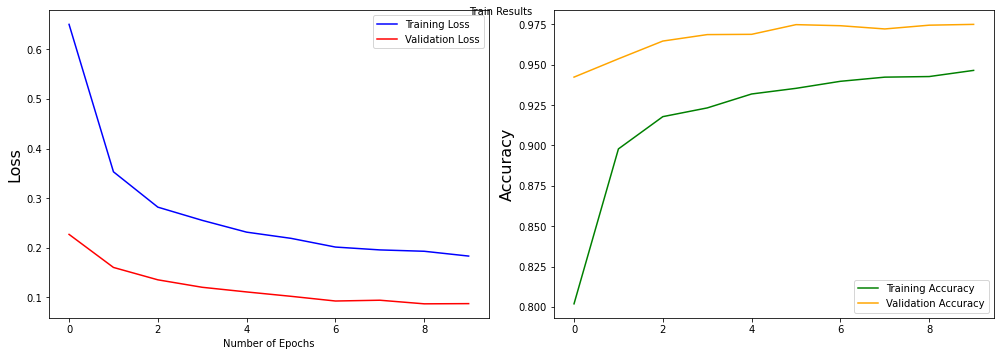

In [65]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.suptitle('Train Results', fontsize=10)
plt.xlabel("Number of Epochs")
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], color='green', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [66]:
print('Train accuracy of the model: ',history.history['accuracy'][-1])

Train accuracy of the model:  0.9465000033378601


In [67]:
print('Train loss of the model: ',history.history['loss'][-1])

Train loss of the model:  0.18311874568462372


In [68]:
print('Validation accuracy of the model: ',history.history['val_accuracy'][-1])

Validation accuracy of the model:  0.9750000238418579


In [69]:
print('Validation loss of the model: ',history.history['val_loss'][-1])

Validation loss of the model:  0.08719662576913834


In [70]:
score = model.evaluate(X_test,Y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Test Loss: 0.07370901852846146
Test Accuracy: 0.9767000079154968


(10000, 28, 28, 1)


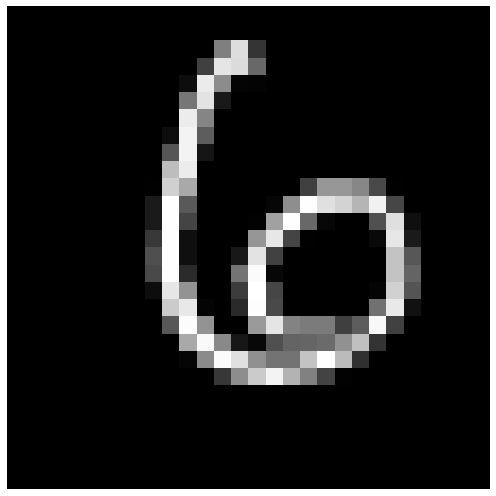

In [71]:
print(X_test.shape)
plt.imshow(X_test[100].reshape(28,28),cmap="gray")
plt.axis("off")
plt.show()

In [26]:
trueY = Y_test[100]
img = X_test[100]
test_img = img.reshape(1,28,28,1)

preds=model.predict(test_img)

prob=np.argmax(preds,axis=1)



print("trueY: ",np.argmax(trueY))#içlerinden en yüksek olan değeri seçer
print("Preds: ",preds)
print("Prob: ",prob)

1/1 [==============================] - 0s 197ms/step
trueY:  6
Preds:  [[6.5756845e-05 1.0537887e-08 5.1037290e-08 1.6791066e-08 2.0129326e-06
  2.8091604e-06 9.9992871e-01 3.7327275e-09 5.2903755e-07 9.5156906e-08]]
Prob:  [6]


313/313 [==============================] - 2s 5ms/step


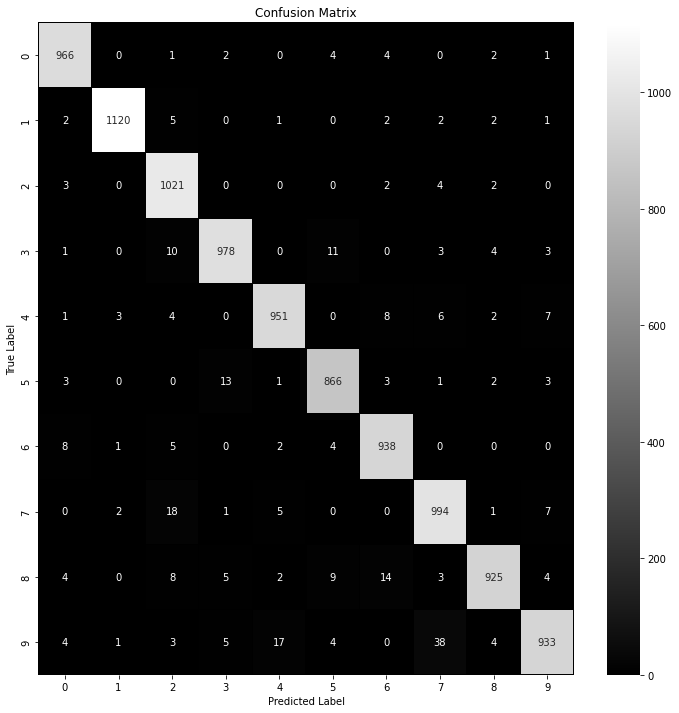

In [27]:
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis = 1)
Y_true = np.argmax(Y_test, axis = 1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

f,ax = plt.subplots(figsize = (12,12))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [28]:
for i in range(len(confusion_mtx)):
    print("Class:",str(i))
    print("Number of Wrong Prediction:", str(sum(confusion_mtx[i])-confusion_mtx[i][i]), "out of 1000")
    print("Percentage of True Prediction: {:.2f}%".format(confusion_mtx[i][i] / 10))
    print("***********************************************************")

Class: 0
Number of Wrong Prediction: 14 out of 1000
Percentage of True Prediction: 96.60%
***********************************************************
Class: 1
Number of Wrong Prediction: 15 out of 1000
Percentage of True Prediction: 112.00%
***********************************************************
Class: 2
Number of Wrong Prediction: 11 out of 1000
Percentage of True Prediction: 102.10%
***********************************************************
Class: 3
Number of Wrong Prediction: 32 out of 1000
Percentage of True Prediction: 97.80%
***********************************************************
Class: 4
Number of Wrong Prediction: 31 out of 1000
Percentage of True Prediction: 95.10%
***********************************************************
Class: 5
Number of Wrong Prediction: 26 out of 1000
Percentage of True Prediction: 86.60%
***********************************************************
Class: 6
Number of Wrong Prediction: 20 out of 1000
Percentage of True Prediction: 93.80%
********

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
%cd /content/drive/MyDrive/Colab Notebooks/



/content/drive/MyDrive/Colab Notebooks


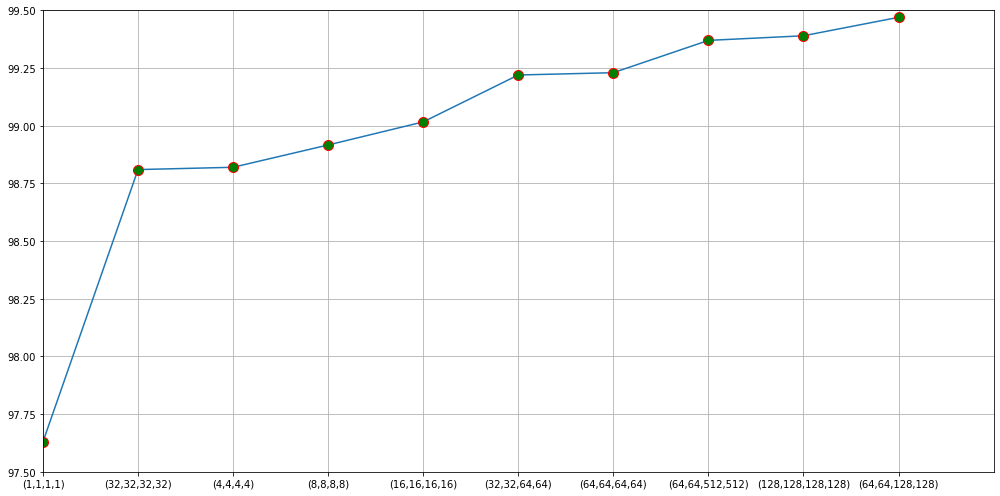

In [53]:
import os
csv_path = os.path.join("layervariation.csv")
df = pd.read_csv(csv_path)
df
plt.rcParams["figure.figsize"] = [14.00, 7.0]
plt.rcParams["figure.autolayout"] = True
plt.xlim(2, 12)
plt.ylim(97.5, 99.5)
plt.xticks([2,3,4,5,6,7,8,9,10,11])
x= [2,3,4,5,6,7,8,9,10,11]
plt.axes().set_xticklabels(['(1,1,1,1)', '(32,32,32,32)', '(4,4,4,4)', '(8,8,8,8)', '(16,16,16,16)', '(32,32,64,64)', '(64,64,64,64)', '(64,64,512,512)', '(128,128,128,128)', '(64,64,128,128)'])
plt.grid()
plt.plot(x, df["accuracy"]*100, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="green")
plt.show()


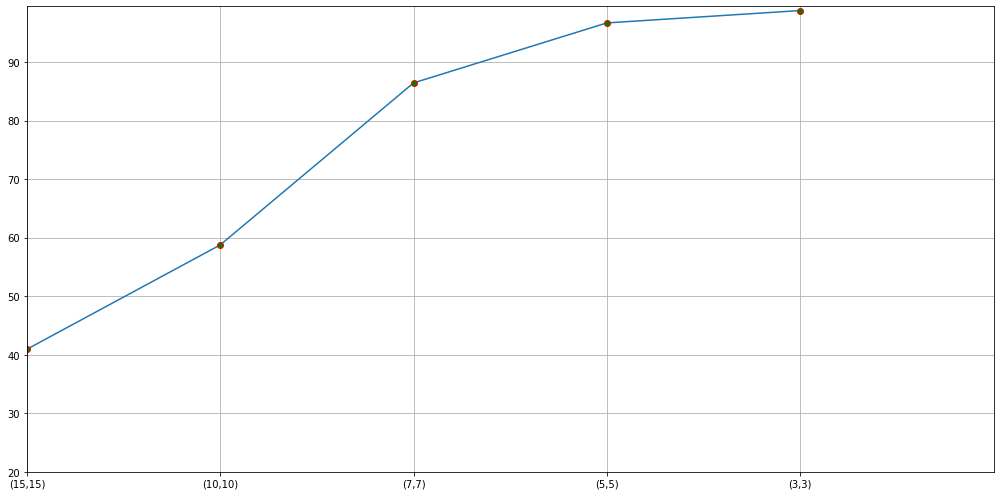

In [79]:

import os
csv_path = os.path.join("stridevariation.csv")
df = pd.read_csv(csv_path)
df
plt.rcParams["figure.figsize"] = [14.00, 7.0]
plt.rcParams["figure.autolayout"] = True
plt.xlim(2, 7)
plt.ylim(20, 99.5)
plt.xticks([2,3,4,5,6])
x= [2,3,4,5,6]
plt.axes().set_xticklabels(['(15,15)', '(10,10)', '(7,7)', '(5,5)', '(3,3)'])
plt.grid()
plt.plot(x, df["accuracy"]*100, marker="o", markersize=6, markeredgecolor="red", markerfacecolor="green")
plt.show()

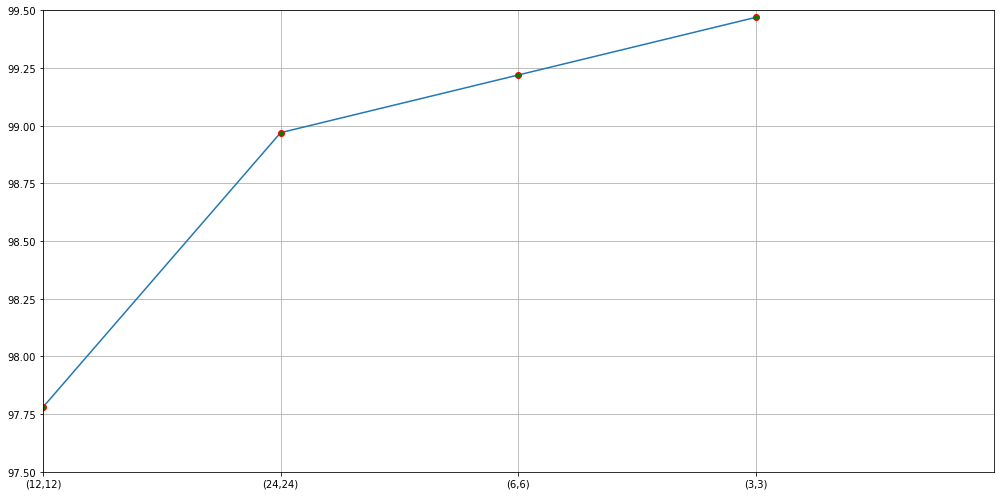

In [85]:


import os
csv_path = os.path.join("filtervariation.csv")
df = pd.read_csv(csv_path)
df
plt.rcParams["figure.figsize"] = [14.00, 7.0]
plt.rcParams["figure.autolayout"] = True
plt.xlim(2, 6)
plt.ylim(97.5, 99.5)
plt.xticks([2,3,4,5])
x= [2,3,4,5]
plt.axes().set_xticklabels(['(12,12)', '(24,24)', '(6,6)', '(3,3)'])
plt.grid()
plt.plot(x, df["accuracy"]*100, marker="o", markersize=6, markeredgecolor="red", markerfacecolor="green")
plt.show()